## Тестовое задание на позицию ML Engineer

Необходимо реализовать модель на основе данного датасета.
Для достижения данной цели нужно обработать датасет, привести его в вид, готовый для обучения с помощью модели МЛ (выбор модели зависит только от вас, ограничений на это нет).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#исходный датасет
data = pd.read_csv('train.csv')
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repository_name  319 non-null    object
 1   commit_hash      319 non-null    object
 2   commit_date      319 non-null    object
 3   commit_author    319 non-null    object
 4   commit_message   319 non-null    object
 5   bugs             319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [4]:
#проверка на наличие дубликатов в записях
data['commit_hash'].duplicated().sum()

0

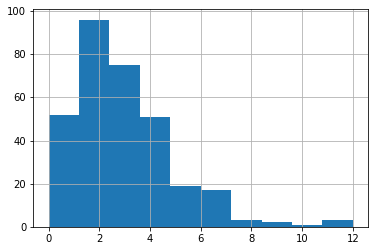

In [5]:
#посмотрим распределение целевой переменной
data.bugs.hist()

In [6]:
data.bugs.describe()

count    319.000000
mean       2.996865
std        1.855636
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: bugs, dtype: float64

In [7]:
data.bugs.median()

3.0

In [8]:
#посмотрим остальные колонки данных
data['repository_name'].unique()

array(['mlm', 'standard', 'agent', 'conductor', 'dockers', 'sensor'],
      dtype=object)

In [9]:
data['commit_author'].unique()

array(['Victor', 'Peggy', 'Wendy', 'Trudy', 'Mallory', 'Eve', 'Dabe',
       'Carol', 'Bob', 'Alice'], dtype=object)

In [10]:
#медианные значения bugs у каждого автора в каждом отлельном репозитории
data.groupby(['repository_name', 'commit_author']).bugs.median()

repository_name  commit_author
agent            Victor           3.0
conductor        Dabe             2.0
                 Eve              3.0
                 Mallory          3.0
                 Trudy            2.0
                 Victor           4.0
                 Wendy            2.0
dockers          Bob              2.5
                 Carol            1.0
                 Mallory          4.0
                 Victor           2.0
                 Wendy            3.0
mlm              Peggy            3.5
                 Victor           4.0
sensor           Alice            0.5
                 Dabe             1.0
                 Eve              3.5
                 Mallory          3.0
                 Trudy            2.0
                 Victor           2.0
                 Wendy            1.0
standard         Victor           4.0
                 Wendy            3.0
Name: bugs, dtype: float64

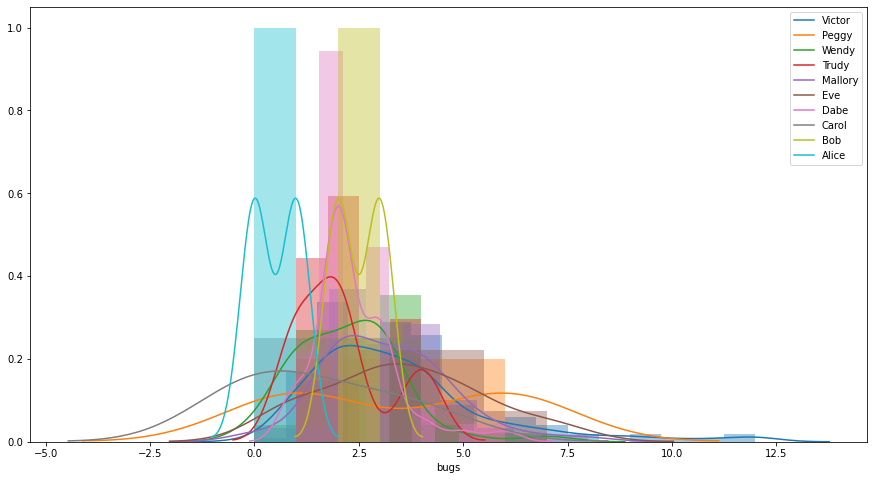

In [11]:
#распределение bugs по каждому из авторов коммитов
plt.figure(figsize=(15,8))
for name in data['commit_author'].unique():
    sns.distplot(data[data['commit_author'] == name].bugs, kde_kws={"label":name})

In [14]:
#кол-во коммитов у каждого автора, очень несбалансированные данные
data.groupby('commit_author')['commit_hash'].count()

commit_author
Alice        2
Bob          2
Carol        4
Dabe        42
Eve          9
Mallory     67
Peggy        2
Trudy        9
Victor     134
Wendy       48
Name: commit_hash, dtype: int64

In [15]:
#кол-во коммитов в каждом репозитории, так же несбалансированны
data.groupby('repository_name')['commit_hash'].count()

repository_name
agent         14
conductor    114
dockers       19
mlm           41
sensor       102
standard      29
Name: commit_hash, dtype: int64

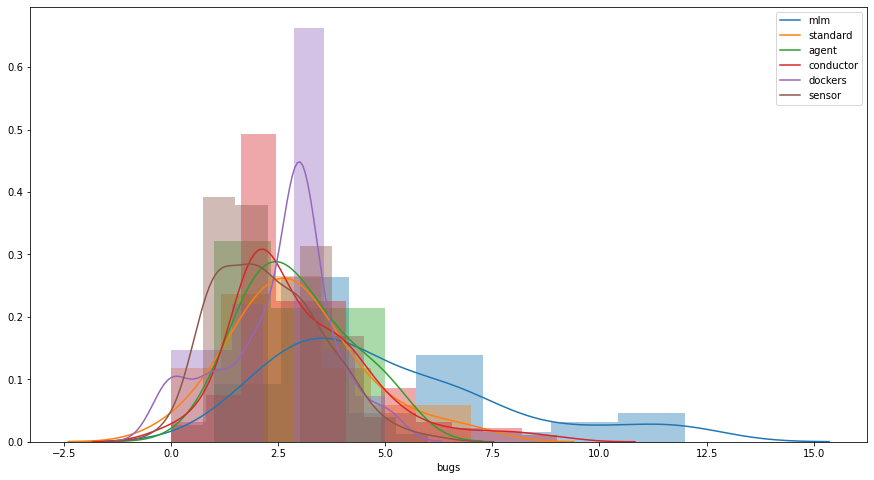

In [16]:
#распределение bugs по каждому из репозиториев
plt.figure(figsize=(15,8))
for name in data['repository_name'].unique():
    sns.distplot(data[data['repository_name'] == name].bugs, kde_kws={"label":name})

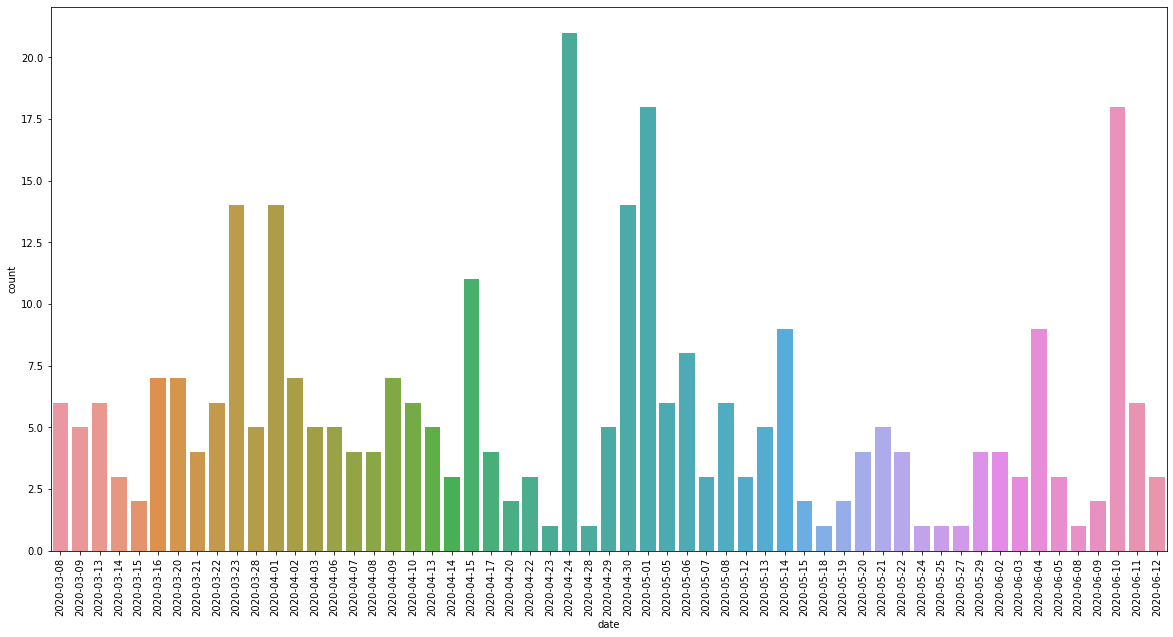

In [17]:
#преобразуем дату и посмотрим на кол-во коммитов по дням
data['date'] = pd.to_datetime(data['commit_date']).dt.date

plt.figure(figsize=(20,10))
sns.countplot(x="date", data=data.sort_values('date'))
plt.xticks(rotation = 90)
plt.show()

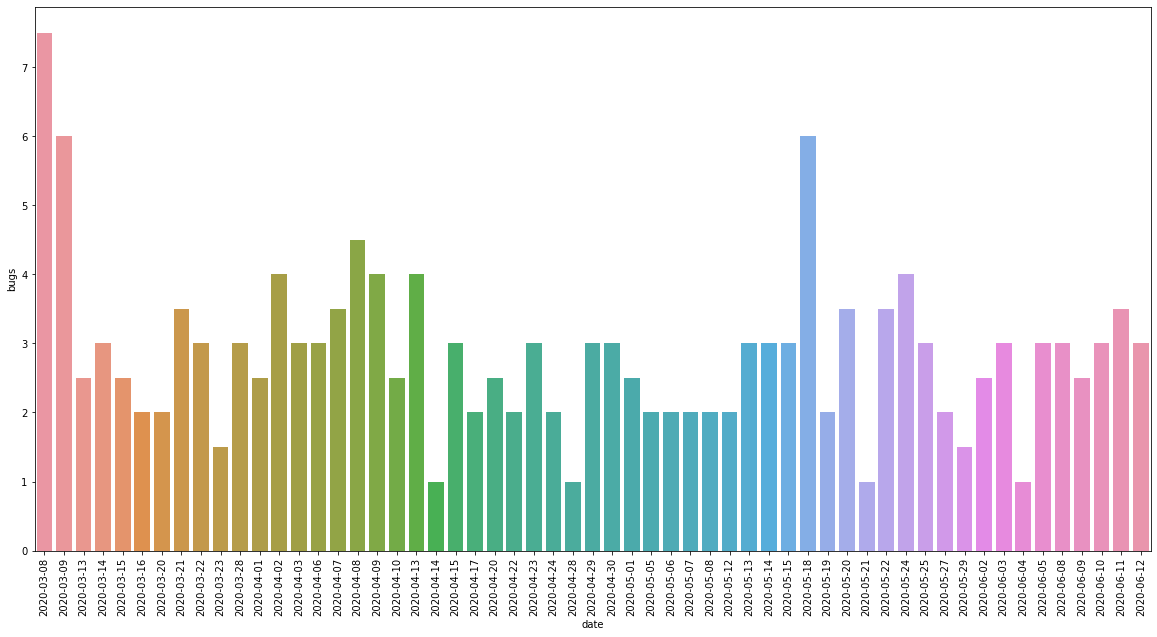

In [18]:
#посмотрим на медианное кол-во bugs по дням
days_bugs = data.groupby('date').bugs.median().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(x='date', y = 'bugs', data=days_bugs.sort_values('date'))
plt.xticks(rotation = 90)
plt.show()

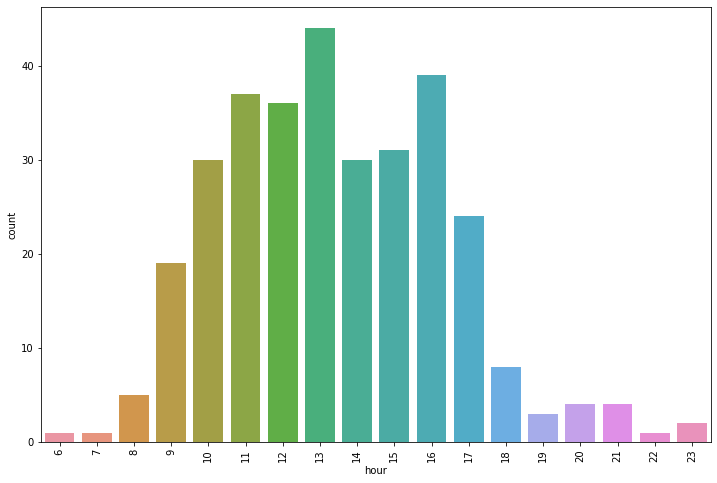

In [19]:
#посмотрим на кол-во и распределение медианы bugs по часам в течения дня
data['hour'] = pd.to_datetime(data['commit_date']).dt.hour

plt.figure(figsize=(12,8))
sns.countplot(x="hour", data=data.sort_values('hour'))
plt.xticks(rotation = 90)
plt.show()

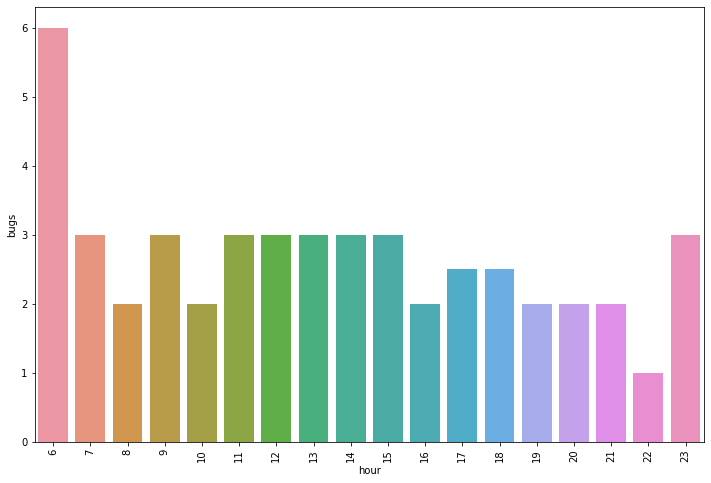

In [20]:
hour_bugs = data.groupby('hour').bugs.median().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='hour', y = 'bugs', data=hour_bugs.sort_values('hour'))
plt.xticks(rotation = 90)
plt.show()

In [25]:
#поанализируем колонку commit_message
data['commit_message'].head(10)

0               объяснения предсказаний с помощью lime
1                            Поставил lime вместо eli5
2                Скрипт для создния пакетов обновления
3                         Сортировка весов по убыванию
4    не надо конвертировать массив до операции по с...
5    Добавлено больше логирования и фикс до частичн...
6                 Отладка, чтоб оно хотябы запускалось
7                Добавил скрипт для запуска контейнера
8                                       label не нужен
9     Установка всех зависимостей теперь в докер файле
Name: commit_message, dtype: object

In [24]:
data['commit_message'].tail(10)

309                         added filebeat config
310                             installer changes
311                             installer changes
312                           start trapconductor
313                              Updated host/lib
314                              setting hostname
315                  heralding default dockerfile
316    unnesserity /data path permissions setting
317                           added trapconductor
318                                        sensor
Name: commit_message, dtype: object

In [26]:
#так как в сообщениях разного рода информация, а попробовать взять информацию для модели из этих данных хочется,
#попробуем разнести коммиты по неким типам работ, как то обновление файлов, исправление, добавление новых, удаление 
#для этого создадим сабфреймы, чтобы использовать их как маски для назначения категории каждому коммиту

#добавление чего-либо в репозиторий
add_com = data[data['commit_message'].str.contains('add', case=False) | data['commit_message'].str.contains('добав', case=False)]

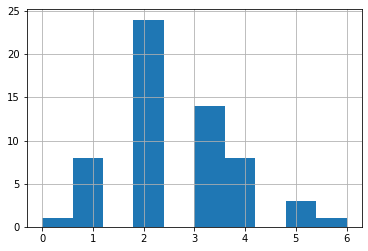

In [27]:
#заодно посмотрим на распределение bugs, будет ли оно отличаться в зависимости от "типа" коммита
add_com.bugs.hist()

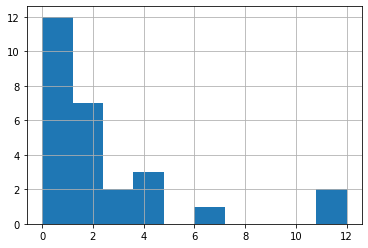

In [28]:
#исправление чего-либо в репозитории
fix_com = data[data['commit_message'].str.contains('fix', case=False) | data['commit_message'].str.contains('испр', case=False) \
              | data['commit_message'].str.contains('испр', case=False) | data['commit_message'].str.contains('почин', case=False)]

fix_com.bugs.hist()

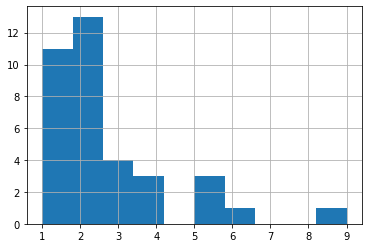

In [29]:
#обновления и апдейты
upd_com = data[data['commit_message'].str.contains('upd', case=False) | data['commit_message'].str.contains('обнов', case=False) \
              | data['commit_message'].str.contains('поменя', case=False)]

upd_com.bugs.hist()

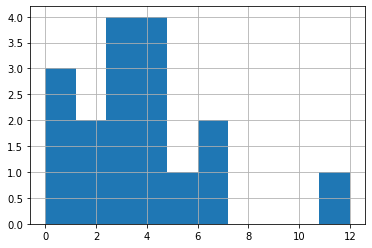

In [30]:
#удаление чего-либо из репозитория
del_com = data[data['commit_message'].str.contains('del', case=False) | data['commit_message'].str.contains('remove', case=False) \
              | data['commit_message'].str.contains('удал', case=False)]

del_com.bugs.hist()

In [33]:
#все остальные коммиты будут в категории other, разделить их по темам достаточно сложно, а может и не имеет смысла
data['category_commit'] = 'other'
#назначение категорий по маскам
data.loc[data['commit_hash'].isin(add_com['commit_hash']), 'category_commit'] = 'add'
data.loc[data['commit_hash'].isin(fix_com['commit_hash']), 'category_commit'] = 'fix'
data.loc[data['commit_hash'].isin(upd_com['commit_hash']), 'category_commit'] = 'upd'
data.loc[data['commit_hash'].isin(del_com['commit_hash']), 'category_commit'] = 'del'
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs,date,hour,category_commit
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4,2020-06-12,14,other
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3,2020-06-12,11,other
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4,2020-06-11,15,upd
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3,2020-06-11,10,other
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7,2020-06-11,9,other


In [34]:
#добавим в основным данным так же колонки с месяцем и днем недели
data['month'] = pd.to_datetime(data['commit_date']).dt.month
data['w_day'] = pd.to_datetime(data['commit_date']).dt.weekday
data.head()

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs,date,hour,category_commit,month,w_day
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4,2020-06-12,14,other,6,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3,2020-06-12,11,other,6,4
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4,2020-06-11,15,upd,6,3
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3,2020-06-11,10,other,6,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7,2020-06-11,9,other,6,3


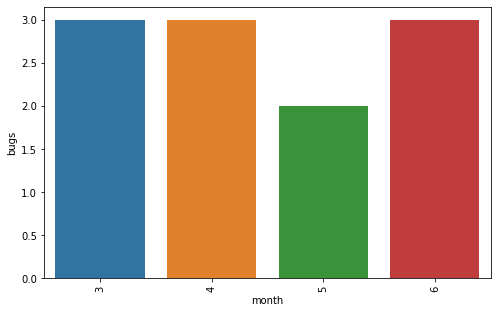

In [36]:
month_bugs = data.groupby('month').bugs.median().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='month', y = 'bugs', data=month_bugs.sort_values('month'))
plt.xticks(rotation = 90)
plt.show()

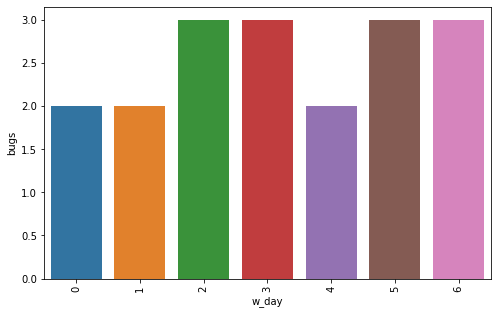

In [37]:
wday_bugs = data.groupby('w_day').bugs.median().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='w_day', y = 'bugs', data=wday_bugs.sort_values('w_day'))
plt.xticks(rotation = 90)
plt.show()

#### Промежуточный вывод по первичному анализу исходного датасета, выбор модели для обучения.

Распределение целевой переменной отлично от нормального. Явной зависимости между какими-то категориями данных не наблюдается. Присутствует сильная несбалансированность по данными между разными категориями - имя репозитория и автор коммита. 

Для нахождения зависимости между bugs и остальными пизнаками логично использовать модели регрессии.
Однако исходя из того, что значения у нас фактически отражают случаи событий - есть нюансы в построении моделей.

Возьмем несколько вариантов алгоритмов и сравним результаты. За метрику оценки возьмем среднюю абсолютную ошибку MAE.
Среди алгоритмов посмотрим на базовую линейную регрессию, Ридж регрессию, регрессию Пуассона так как она хорошо подходит для решения задач предсказания случаев, и модель градиентного бустинга с функцией ошибки Пуассона.  

In [38]:
#создадим датасеты с нужными признаками для обучения и с таргетом
data_fit = data[['repository_name', 'commit_author', 'category_commit','month', 'w_day', 'hour']].copy()
y_fit = data.bugs.copy()

In [39]:
data_fit.head()

,repository_name,commit_author,category_commit,month,w_day,hour
0,mlm,Victor,other,6,4,14
1,mlm,Victor,other,6,4,11
2,mlm,Victor,upd,6,3,15
3,mlm,Victor,other,6,3,10
4,mlm,Victor,other,6,3,9


In [40]:
y_fit.head()

0    4
1    3
2    4
3    3
4    7
Name: bugs, dtype: int64

In [45]:
#используя heatmap посмотрим нет ли мультиколлинеарности среди созданных признаков
#предварительно проранжируем категориальные переменные
feature_data = data_fit.copy()
feature_data['repository_name'] = feature_data['repository_name'].map( {'mlm': 0, 'standard': 1, 'agent': 2, 'conductor': 3, 'dockers': 4, 'sensor': 5} ).astype(int)
feature_data['category_commit'] = feature_data['category_commit'].map( {'other': 0, 'upd': 1, 'add': 2, 'del': 3, 'fix': 4} ).astype(int)
title_mapping = {'Victor': 1, 'Peggy': 2, 'Wendy': 3, 'Trudy': 4, 'Mallory': 5, 'Eve': 6, 'Dabe': 7, 'Carol': 8, 'Bob': 9, 'Alice': 0}
feature_data['commit_author'] = feature_data['commit_author'].map(title_mapping)
feature_data['bugs'] = y_fit
feature_data.head()

,repository_name,commit_author,category_commit,month,w_day,hour,bugs
0,0,1,0,6,4,14,4
1,0,1,0,6,4,11,3
2,0,1,1,6,3,15,4
3,0,1,0,6,3,10,3
4,0,1,0,6,3,9,7


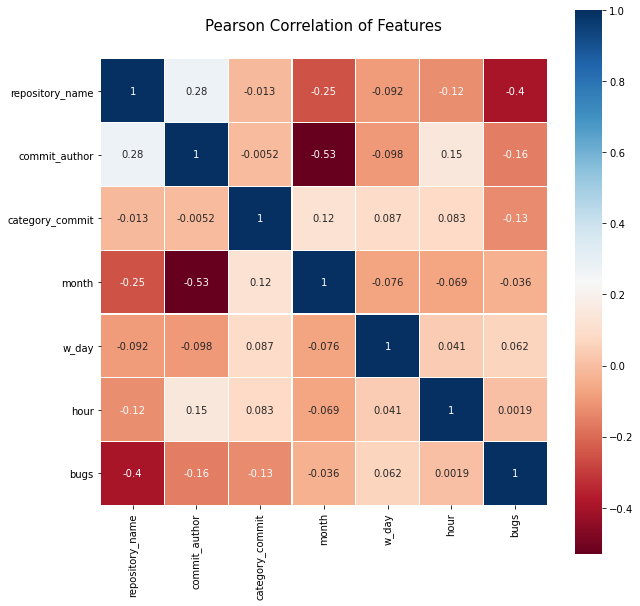

In [46]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(feature_data.corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Сильных корреляций нет, можно использовать выбранные модели регрессий, в противном случае лучше было бы убрать признаки, которые сильно друг с другом коррелируют.

In [50]:
#разделим данные на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_fit, y_fit, test_size=0.3, random_state=10)

In [53]:
#обозначим препроцессинг данных, чтобы категориальные переменные кодировались по принципу OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    [('onehot_categorical', OneHotEncoder(), ['repository_name', 'commit_author', 'category_commit'])],
    remainder = 'passthrough')

LinearRegression MAE: 1.276


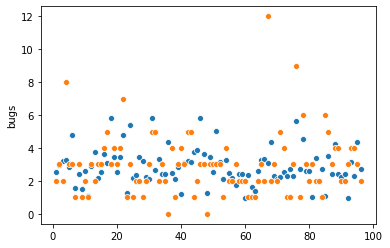

In [95]:
#модель простой регрессии будет для сравнения
#таргет прологарифмируем, так мы приблизим его распределение к нормальному, а при подсчете ошибки брать обратную операцию
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

lin_reg = Pipeline([
    ("preprocessor", ct),
    ("regressor", LinearRegression())
])

lin_reg.fit(x_train, y_train.apply(np.log1p))

y_pred = lin_reg.predict(x_test)

print("LinearRegression MAE: %.3f" % mean_absolute_error(y_test, np.expm1(y_pred)))

#посмотрим графически как распределились предсказания относительно реальных данных
sns.scatterplot(x=range(1, 97), y=np.expm1(y_pred))
sns.scatterplot(x=range(1, 97), y=y_test)

Ridge MAE: 1.204


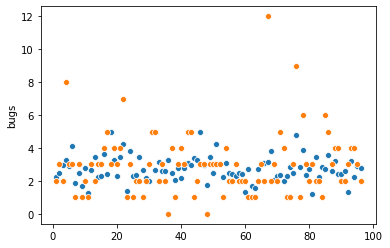

In [96]:
#Ридж регрессия
from sklearn.linear_model import Ridge

ridge_glm = Pipeline([
    ("preprocessor", ct),
    ("regressor", Ridge(alpha=15)),
]).fit(x_train, y_train.apply(np.log1p))

y_pred = ridge_glm.predict(x_test)

print("Ridge MAE: %.3f" % mean_absolute_error(y_test, np.expm1(y_pred)))

sns.scatterplot(x=range(1, 97), y=np.expm1(y_pred))
sns.scatterplot(x=range(1, 97), y=y_test)

PoissonRegressor MAE: 1.212


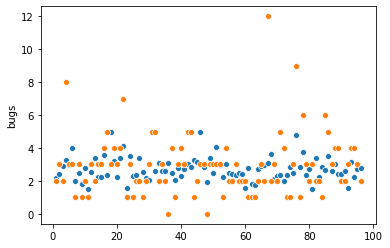

In [97]:
#регрессия Пуассона
from sklearn.linear_model import PoissonRegressor

poisson_glm = Pipeline([
    ("preprocessor", ct),
    ("regressor", PoissonRegressor(alpha=0.14, max_iter=100))
])
poisson_glm.fit(x_train, y_train.apply(np.log1p))

y_pred = poisson_glm.predict(x_test)

print("PoissonRegressor MAE: %.3f" % mean_absolute_error(y_test, np.expm1(y_pred)))

sns.scatterplot(x=range(1, 97), y=np.expm1(y_pred))
sns.scatterplot(x=range(1, 97), y=y_test)

HistGradientBoostingRegressor MAE: 1.222


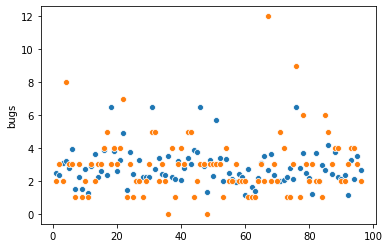

In [98]:
#градиентный бустинг с лосс функцией Пуассона
#параметры подобраны эмпирически
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder


tree_preprocessor = ColumnTransformer(
    [
        ("categorical", OrdinalEncoder(),
            ['repository_name', 'commit_author', 'category_commit'])],
    remainder = 'passthrough')
        
poisson_gbrt = Pipeline([
    ("preprocessor", tree_preprocessor),
    ("regressor", HistGradientBoostingRegressor(loss="poisson",
                                                learning_rate = 0.2,
                                                max_iter = 500,
                                                max_leaf_nodes=2,
                                                min_samples_leaf = 10,
                                                l2_regularization = 10)),
])
poisson_gbrt.fit(x_train, y_train.apply(np.log1p))

y_pred = poisson_gbrt.predict(x_test)

print("HistGradientBoostingRegressor MAE: %.3f" % mean_absolute_error(y_test, np.expm1(y_pred)))

sns.scatterplot(x=range(1, 97), y=np.expm1(y_pred))
sns.scatterplot(x=range(1, 97), y=y_test)

По значению средней ошибки модели дают примерно одинаковый результат. Визуально модель линейной регрессии и бустинг предсказывают более разбросанные значения. Однако в общем показатель полезности моделей оставляет желать лучшего. Ни одну из них нельзя использовать для предсказания кол-ва bugs.

In [132]:
#попробуем найти наилучшие параметры для модели бустинга с помощью RandomizedSearchCV и кросс-валидации
from sklearn.model_selection import (RandomizedSearchCV, KFold)
kf = KFold(n_splits=3)

gbr_params = {'regressor__learning_rate': np.arange(0.1, 0.6, 0.05),
             'regressor__max_iter': np.arange(100, 800, 50),
             'regressor__max_leaf_nodes': np.arange(2, 100, 2),
             'regressor__min_samples_leaf': np.arange(1, 100, 5),
             'regressor__l2_regularization': np.arange(1, 20, 1)}

tree_preprocessor = ColumnTransformer(
    [("categorical", OneHotEncoder(handle_unknown='ignore'),
            ['repository_name', 'commit_author', 'category_commit'])],
    remainder = 'passthrough')

poisson_gbrt = Pipeline([
    ("regressor", HistGradientBoostingRegressor(loss="poisson"))
])

clf_gbr = RandomizedSearchCV(poisson_gbrt, gbr_params, cv=kf)

In [133]:
X = data_fit.copy()
X['repository_name'] = X['repository_name'].map( {'mlm': 0, 'standard': 1, 'agent': 2, 'conductor': 3, 'dockers': 4, 'sensor': 5} ).astype(int)
X['category_commit'] = X['category_commit'].map( {'other': 0, 'upd': 1, 'add': 2, 'del': 3, 'fix': 4} ).astype(int)
title_mapping = {'Victor': 1, 'Peggy': 2, 'Wendy': 3, 'Trudy': 4, 'Mallory': 5, 'Eve': 6, 'Dabe': 7, 'Carol': 8, 'Bob': 9, 'Alice': 0}
X['commit_author'] = X['commit_author'].map(title_mapping).astype(int)

clf_gbr.fit(X, y_fit.apply(np.log1p))

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('regressor',
                                              HistGradientBoostingRegressor(loss='poisson'))]),
                   param_distributions={'regressor__l2_regularization': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'regressor__learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55]),
                                        'regressor__max_iter': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750]),
                                        'regressor__max_leaf_nodes': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]),
                                

In [134]:
print(f'Best Params: {clf_gbr.best_params_}')

Best Params: {'regressor__min_samples_leaf': 16, 'regressor__max_leaf_nodes': 90, 'regressor__max_iter': 250, 'regressor__learning_rate': 0.25000000000000006, 'regressor__l2_regularization': 9}


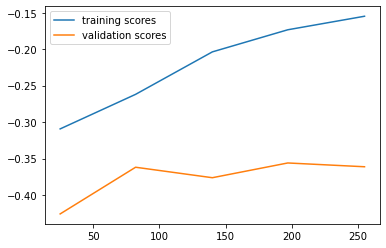

In [160]:
#посмотрим на кривые обучения
from sklearn.model_selection import learning_curve
N_train, val_train, val_test = learning_curve(clf_gbr.best_estimator_, X, y_fit.apply(np.log1p), cv=5, scoring='neg_mean_absolute_error')

plt.plot(N_train, np.mean(val_train, axis=1), label='training scores')
plt.plot(N_train, np.mean(val_test, axis=1), label='validation scores')
plt.legend()

HistGradientBoostingRegressor MAE: 1.202


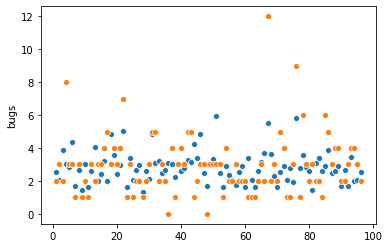

In [190]:
#обучим модель с лучшими параметрами 
poisson_gbrt = HistGradientBoostingRegressor(loss="poisson",
                                                learning_rate = 0.25,
                                                max_iter = 250,
                                                max_leaf_nodes=90,
                                                min_samples_leaf = 16,
                                                l2_regularization = 9,
                                                scoring='neg_mean_absolute_error',
                                                early_stopping = True)

x_train, x_test, y_train, y_test = train_test_split(X, y_fit, test_size=0.3, random_state=10)

poisson_gbrt.fit(x_train, y_train.apply(np.log1p))

y_pred = poisson_gbrt.predict(x_test)

print("HistGradientBoostingRegressor MAE: %.3f" % mean_absolute_error(y_test, np.expm1(y_pred)))

sns.scatterplot(x=range(1, 97), y=np.expm1(y_pred))
sns.scatterplot(x=range(1, 97), y=y_test)

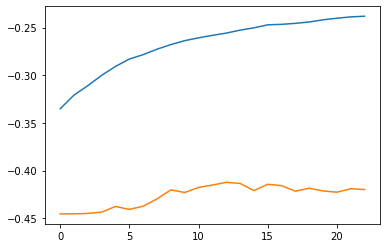

In [191]:
#оценим поведение ошибки в процессе обучения в зависимости от итераций
n_iter = poisson_gbrt.n_iter_
train_score = poisson_gbrt.train_score_
valid_score = poisson_gbrt.validation_score_

plt.plot(range(n_iter+1), train_score, label='train_scores')
plt.plot(range(n_iter+1), valid_score, label='valid_scores')

### Выводы.

Подгонка параметров методом RandomizedSearchCV и кросс-валидации не уменьшила ошибку. 

По графикам learning_curve видно, что с увеличением выборки для обучения, ошибка на трейне продолжает уменьшатся, а ошибка на валидации имеет некий минимум, а потом берет тенденцию на увеличение, то есть тенденцию на переобучение. Возможно добавление данных в выборку сильно не изменит результат в лучшую сторону. 

Кроме того, на графиках обучения внутри самого бустинга видно, что при включении опции раннего останова алгоритм останавливается даже раньше, чем предложенное кол-во итераций в лучшей модели RandomizedSearchCV. И на графике обучения не видно тенденции к уменьшению ошибки при увеличении кол-ва итераций.

Возможно для улучшения построения модели для данной задачи предсказания числа bugs необходимо добавить еще каких-либо признаков. Но из исходных данных особо значимых фичей больше не возьмешь. 